In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
sns.set(style="ticks", color_codes=True)

In [2]:
data = pd.read_csv('dataset.csv', parse_dates=['date'])
data = data.set_index('date')

In [3]:
data['2019-04-02']

,P1,P2,pressure,temperature,humidity,P1_std,P2_std,pressure_std,temperature_std,humidity_std,temp_meteo,pres_meteo,hum_meteo,wind_direction,wind_speed,precipitation,prec_amount,visibility,dew_point_temp
date,,,,,,,,,,,,,,,,,,,
2019-04-02 00:00:00,5.804000,2.891667,100264.60125,1.01375,70.91500,2.026611,0.729395,643.988619,1.594357,4.096385,-1.6,99644.8628,65,"Ветер, дующий с северо-запада",2,NaN,0.1,10.0,-7.4
2019-04-02 00:05:00,6.453333,2.772000,100273.59000,1.00875,70.63375,1.974880,0.598092,642.861510,1.595407,4.270225,-1.6,99644.8628,65,"Ветер, дующий с северо-запада",2,NaN,0.1,10.0,-7.4
2019-04-02 00:10:00,6.015000,2.777500,100276.52375,1.00000,70.51875,2.001031,0.626286,644.941066,1.560401,4.062557,-1.6,99644.8628,65,"Ветер, дующий с северо-запада",2,NaN,0.1,10.0,-7.4
2019-04-02 00:15:00,5.991071,2.757857,100280.20625,0.98000,70.36750,1.696430,0.552361,645.041267,1.597503,4.176862,-1.6,99644.8628,65,"Ветер, дующий с северо-запада",2,NaN,0.1,10.0,-7.4
2019-04-02 00:20:00,5.867500,2.703929,100281.84375,0.97125,70.20250,2.055271,0.569531,643.591465,1.600351,4.232242,-1.6,99644.8628,65,"Ветер, дующий с северо-запада",2,NaN,0.1,10.0,-7.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-02 23:35:00,16.971667,5.255333,100527.03875,3.74875,47.77000,7.614822,2.193313,650.333829,2.240024,6.806393,-1.6,99644.8628,65,"Ветер, дующий с северо-запада",2,NaN,0.1,10.0,-7.4
2019-04-02 23:40:00,18.038000,5.139333,100525.07125,3.63875,48.15375,8.367726,1.952622,648.018155,2.266783,6.878125,-1.6,99644.8628,65,"Ветер, дующий с северо-запада",2,NaN,0.1,10.0,-7.4
2019-04-02 23:45:00,16.725714,5.347857,100530.20875,3.63500,48.31500,7.153631,2.119980,649.001153,2.201117,6.800332,-1.6,99644.8628,65,"Ветер, дующий с северо-запада",2,NaN,0.1,10.0,-7.4


In [7]:
wind_dir = {'Ветер, дующий с востока': 0,
            'Ветер, дующий с востоко-северо-востока': 45/2,
            'Ветер, дующий с северо-востока': 45,
            'Ветер, дующий с северо-северо-востока': 45 + 45/2,
            'Ветер, дующий с севера': 90,
            'Ветер, дующий с северо-северо-запад': 90 + 45/2,
            'Ветер, дующий с северо-запада': 135,
            'Ветер, дующий с западо-северо-запада': 135 + 45/2,
            'Ветер, дующий с запада': 180,
            'Ветер, дующий с западо-юго-запада': 180+45/2,
            'Ветер, дующий с юго-запада': 225,
            'Ветер, дующий с юго-юго-запада': 225 + 45/2,
            'Ветер, дующий с юга': 270,
            'Ветер, дующий с юго-юго-востока': 270 + 45/2,
            'Ветер, дующий с юго-востока': 315,
            'Ветер, дующий с востоко-юго-востока': 315 + 45/2,
            'Штиль, безветрие': None,
           }

In [8]:
data['wind_direction'] = data.wind_direction.map(wind_dir)
data['wind_direction'] = data.wind_direction.fillna(method='pad')

In [9]:
data['P1'] = data.P1.interpolate()
data['P2'] = data.P2.interpolate()
data['pressure'] = data.pressure.interpolate()
data['temperature'] = data.temperature.interpolate()
data['humidity'] = data.humidity.interpolate()
data['P1_std'] = data.P1_std.interpolate()
data['P2_std'] = data.P2_std.interpolate()
data['pressure_std'] = data.pressure_std.interpolate()
data['temperature_std'] = data.temperature_std.interpolate()
data['humidity_std'] = data.humidity_std.interpolate()

In [10]:
data['precipitation'] = data.precipitation.fillna(value=0)
data['prec_amount'] = data.prec_amount.fillna(value=0)

In [11]:
prec_codes = {0:0,
              'Облака покрывали половину неба или менее в течение всего соответствующего периода': 1,
              'Облака покрывали более половины неба в течение одной части соответствующего периода и' 
              'половину или менее в течение другой части периода.': 1,
              'Облака покрывали более половины неба в течение всего соответствующего периода.': 1,
              'Снег и/или другие виды твердых осадков': 2,
              'Морось.': 2,
              'Дождь со снегом или другими видами твердых осадков': 2,
              'Гроза (грозы) с осадками или без них.': 3,
              'Ливень (ливни).': 3,
              'Дождь.': 3,  
             }
data['precipitation'] = data.precipitation.map(prec_codes)

In [12]:
data['is_cloud'] = (data.precipitation == 1).astype(int)
data['is_snow'] = (data.precipitation == 2).astype(int)
data['is_rain'] = (data.precipitation == 3).astype(int)

In [13]:
data.loc[data.prec_amount == 'Осадков нет', 'prec_amount'] = 0
data.loc[data.prec_amount == 'Следы осадков', 'prec_amount'] = 0
data['prec_amount'] = data.prec_amount.astype(float)

In [14]:
data.prec_amount.value_counts()

0.0     59689
0.5      2592
0.3      2484
1.0      2124
2.0      1296
0.1       936
3.0       468
0.8       468
4.0       396
5.0       324
10.0      252
7.0       252
12.0      216
13.0      144
6.0       144
0.4       108
9.0       108
18.0       72
0.2        36
14.0       36
0.6        36
8.0        36
11.0       36
0.9        36
Name: prec_amount, dtype: int64

In [15]:
for c in data.columns:
    if data[c].isnull().values.any():
        print(c)

precipitation
visibility


In [16]:
weeks = [g for n, g in data.groupby(pd.Grouper(freq='7D'))]

In [17]:
anom_list = []
for w in weeks[:-2]:
    w['P1'] = w.P1.interpolate()
    w['P1'] = w.P1.rolling(4, min_periods=1).mean()
    freq = round(60*25/5) # 1 day
    decomp = sm.tsa.seasonal_decompose(w.P1, model='additive', freq=freq, extrapolate_trend='freq')
    q = decomp.resid.quantile(0.85)
    idx = decomp.resid[abs(decomp.resid)>q].index
    w['trend'] = decomp.trend
    w['seasonal'] = decomp.seasonal
    w['resid'] = decomp.resid
    w['anomaly'] = abs(w.resid)>q
    anomaly = w[w['anomaly']]
    anomaly['gap'] = (anomaly.index.to_series().diff()) > pd.Timedelta(10, 'm')
    l_mod = pd.to_datetime(anomaly[anomaly.gap].index)
    l_mod = l_mod.insert(0, anomaly.index[0])
    l_mod = l_mod.insert(len(l_mod), anomaly.index[-1])
    l = [anomaly[l_mod[n]:l_mod[n+1]] for n in range(0, len(l_mod)-1, 1)]
    l = [i[:-1] for i in l]
    l = [i for i in l if len(i) > 12]
    anom_list = anom_list + l

/home/anatoly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


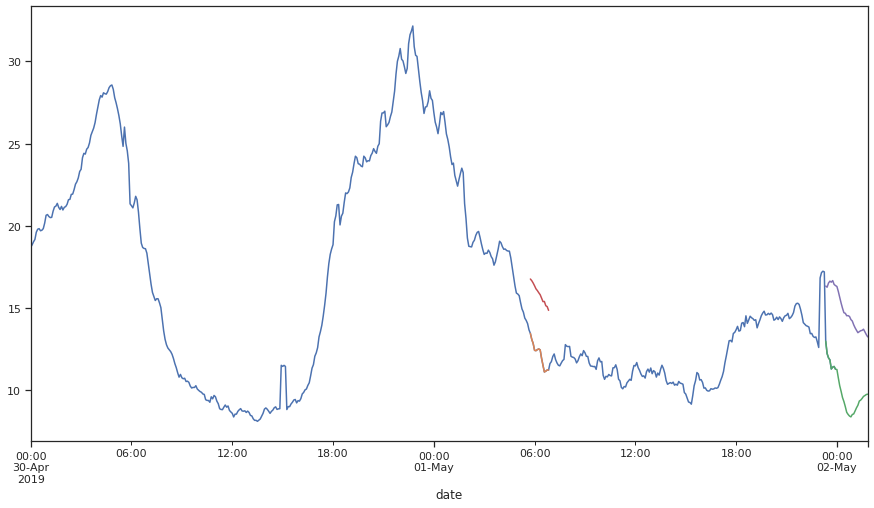

In [18]:
plt.figure(figsize=(15,8))
data['2019-04-30':'2019-05-1'].P1.plot()
anom_list[61].P1.plot()
anom_list[62].P1.plot()
(anom_list[61].trend+anom_list[61].seasonal).plot()
(anom_list[62].trend+anom_list[62].seasonal).plot()

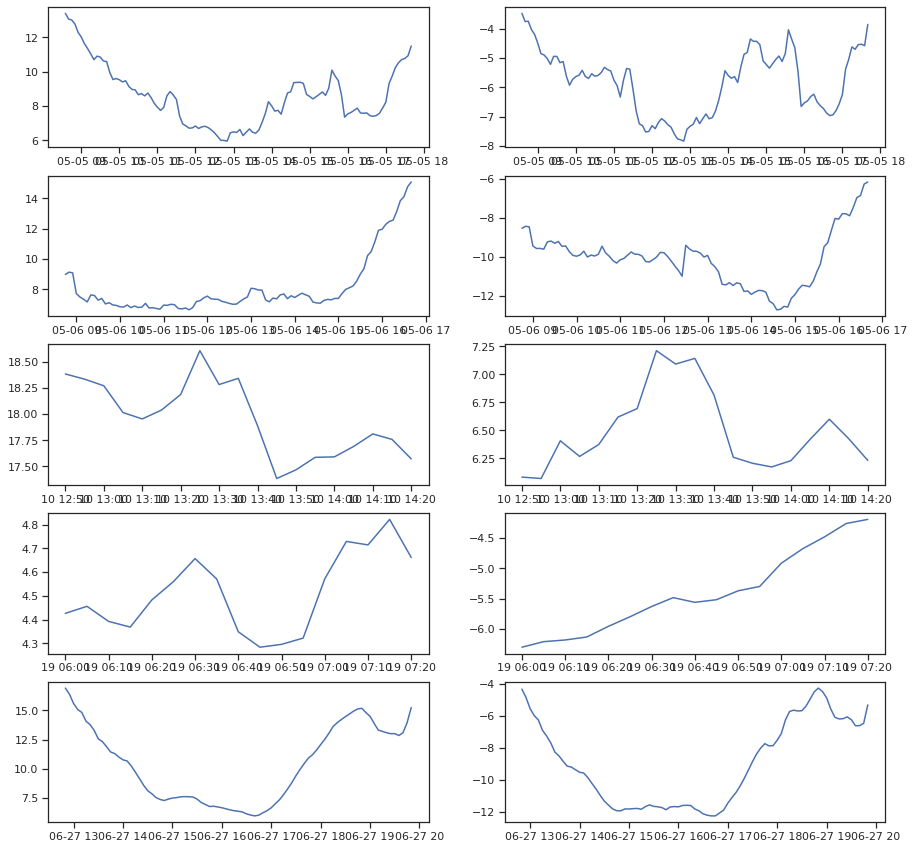

In [19]:
f, axs = plt.subplots(5,2,figsize=(15,15))
ax = 0
for i in [70, 71, 80, 91, 174]:
    axs[ax,0].plot(anom_list[i].P1)
    axs[ax,1].plot(anom_list[i].resid)
    ax += 1

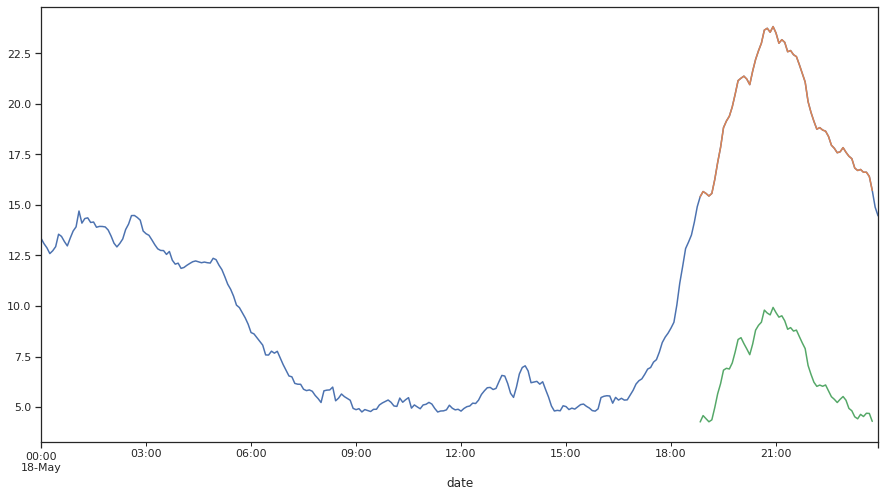

In [24]:
plt.figure(figsize=(15,8))
data['2019-05-18'].P1.plot()
anom_list[90].P1.plot()
anom_list[90].resid.plot()

In [62]:
anomdata = pd.DataFrame(index=[i for i in range(len(anom_list))])

In [63]:
# anomdata['positive'] = [int(np.mean(i.resid) > 0) for i in anom_list]
# anomdata['resid'] = [i.resid.mean() for i in anom_list]
# anomdata['minutes'] = [len(i)*5 for i in anom_list]
anomdata['max_P1'] = [i.P1.max() for i in anom_list]
anomdata['min_P1'] = [i.P1.min() for i in anom_list]
anomdata['min_P2'] = [i.P2.min() for i in anom_list]
anomdata['max_P2'] = [i.P2.max() for i in anom_list]
anomdata['mean_hum'] = [i.humidity.mean() for i in anom_list]
anomdata['change_hum'] = [i.humidity.max()-i.humidity.min() for i in anom_list]
# anomdata['mean_temp'] = [i.temperature.mean() for i in anom_list]
anomdata['change_temp'] = [i.temperature.max()-i.temperature.min() for i in anom_list]
anomdata['cloud'] = [int(1 in i.is_cloud.values) for i in anom_list]
anomdata['snow'] = [int(1 in i.is_snow.values) for i in anom_list]
anomdata['rain'] = [int(1 in i.is_rain.values) for i in anom_list]
anomdata['prec_amount'] = [i.prec_amount.mean() for i in anom_list]
anomdata['max_w_speed'] = [i.wind_speed.max() for i in anom_list]
anomdata['min_w_speed'] = [i.wind_speed.min() for i in anom_list]
anomdata['w_dir_sin_max'] = [np.max(np.sin(i.wind_direction)) for i in anom_list]
anomdata['w_dir_sin_mix'] = [np.min(np.sin(i.wind_direction)) for i in anom_list]
anomdata['w_dir_cos_max'] = [np.max(np.cos(i.wind_direction)) for i in anom_list]
anomdata['w_dir_cos_min'] = [np.min(np.cos(i.wind_direction)) for i in anom_list]

In [64]:
anomdata.head()

,max_P1,min_P1,min_P2,max_P2,mean_hum,change_hum,change_temp,cloud,snow,rain,prec_amount,max_w_speed,min_w_speed,w_dir_sin_max,w_dir_sin_mix,w_dir_cos_max,w_dir_cos_min
0,5.414762,3.010760,0.711310,3.882333,50.314649,24.73125,5.173333,0,0,0,0.1,2,2,0.088369,0.088369,-0.996088,-0.996088
1,3.848393,1.831154,0.820714,2.245357,69.908733,7.54000,0.461250,0,0,0,0.1,2,2,0.088369,0.088369,-0.996088,-0.996088
2,15.113750,6.920964,1.756667,17.919643,50.456983,13.00375,2.843750,0,0,0,0.1,2,2,0.088369,0.088369,-0.996088,-0.996088
3,20.088662,18.363661,5.455357,8.004000,47.832333,9.79375,3.845000,0,0,0,0.1,2,2,0.088369,0.088369,-0.996088,-0.996088
4,20.681305,13.683287,3.135000,6.712143,34.368237,11.16625,3.440000,0,0,0,0.0,1,1,-0.999021,-0.999021,-0.044228,-0.044228


In [65]:
#g = sns.pairplot(anomdata)

In [66]:
pca = PCA(n_components=3)
pca.fit(anomdata)
X = pca.transform(anomdata)

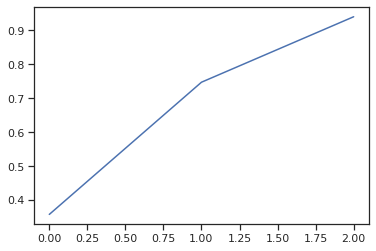

In [67]:
plt.plot(1-pca.explained_variance_ratio_)

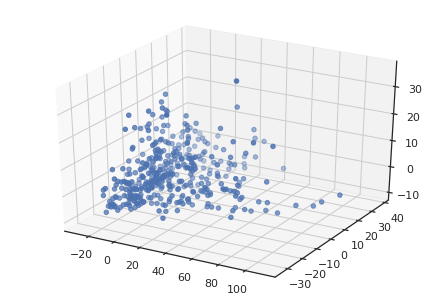

In [68]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:,1], X[:,2])

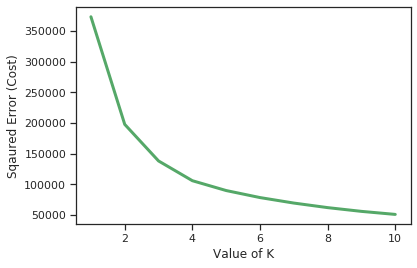

In [69]:
cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(X) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 

In [70]:
KM = KMeans(n_clusters = 4, random_state=42)
KM.fit(X)
anomdata['cluster'] = KM.labels_

In [71]:
anomdata.cluster.value_counts()

3    162
0    143
1     92
2     29
Name: cluster, dtype: int64

In [72]:
anomdata.groupby(['cluster']).mean()

,max_P1,min_P1,min_P2,max_P2,mean_hum,change_hum,change_temp,cloud,snow,rain,prec_amount,max_w_speed,min_w_speed,w_dir_sin_max,w_dir_sin_mix,w_dir_cos_max,w_dir_cos_min
cluster,,,,,,,,,,,,,,,,,
0,13.609987,9.337095,4.248932,7.109698,38.631461,9.241951,4.023519,0.034965,0.013986,0.090909,0.191068,1.314685,0.916084,0.188404,-0.289624,0.164881,-0.297415
1,36.834045,27.043162,14.745870,21.427420,59.521506,7.536135,2.584588,0.054348,0.000000,0.173913,0.207016,1.130435,0.608696,0.074824,-0.301443,0.138524,-0.280691
2,67.603428,48.281730,23.093586,31.675676,69.355789,4.545824,1.526396,0.517241,0.000000,0.310345,0.632194,0.896552,0.448276,0.143170,-0.361683,0.100349,-0.452505
3,12.763208,8.569381,4.541924,7.865697,66.124544,8.276715,2.581566,0.049383,0.055556,0.302469,0.505582,1.320988,0.969136,0.087276,-0.314472,0.054471,-0.375389


In [ ]:
f, axs = plt.subplots(5,2,figsize=(15,15))
avg_data_nov.P1.plot(ax=axs[0, 0])
avg_data_nov.P2.plot(ax=axs[1, 0])
avg_data_nov.temperature.plot(ax=axs[2, 0])
avg_data_nov.pressure.plot(ax=axs[3, 0])
avg_data_nov.humidity.plot(ax=axs[4, 0])
avg_data_nov.P1_std.plot(ax=axs[0, 1])
avg_data_nov.P2_std.plot(ax=axs[1, 1])
avg_data_nov.temperature_std.plot(ax=axs[2, 1])
avg_data_nov.pressure_std.plot(ax=axs[3, 1])
avg_data_nov.humidity_std.plot(ax=axs[4, 1])
axs[0, 0].set_title('P1')
axs[1, 0].set_title('P2')
axs[2, 0].set_title('temperature')
axs[3, 0].set_title('pressure')
axs[4, 0].set_title('humidity')
axs[1, 1].set_title('P1 std')
axs[1, 1].set_title('P2 std')
axs[2, 1].set_title('temperature std')
axs[3, 1].set_title('pressure std')
axs[4, 1].set_title('humidity std')